# Übung 4

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### 4.1 Regularisierung mit Weight Decay

*Weight Decay* ist eine klassische Regularisierungsmethode, die Ihnen in unterschiedlichen Formen ganz häufig in Machine Learning Projekten begegnen wird. In dieser Übung werden Sie *Weight Decay Regularisierung* für Regression implementieren und testen.

In [39]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from numpy.polynomial import Polynomial
import matplotlib.patches as mpatches

def get_target_function():
    return Polynomial((1, 2, -1, -2))


def get_data(sigma=0, N=5):
    np.random.seed(3)
    p = Polynomial((1, 2, -1, -2))
    x = np.sort(np.random.random_sample(size=N) * 2 - 1)
    noise = np.random.standard_normal(len(x))
    return x, p(x) + noise*sigma


X_4_1, y_4_1 = get_data(N=5,sigma=.1)

**Ihre Aufgaben**

(1) Nehmen Sie die Folien der Vorlesung zur Hand und schlagen Sie nach, wie lineare Regression mit Weight Decay definiert ist. Konkret: Schlagen Sie nach, wie die Lösung $w_\text{reg}$ der linearen Regression mit Weight Decay aussieht.

(2) Implementieren Sie eine Funktion `lin_reg_regularized`, die die Features $x$, die Labels $y$ sowie den Regularisierungsparameter $\lambda$ entgegennimmt und den Gewichtsvektor der finalen Hypothese $w_\text{reg}$ zurückgibt. [Dieser Befehl](https://docs.scipy.org/doc/numpy/reference/generated/numpy.identity.html) kann Ihnen bei der Implementierung helfen.

In [22]:
def lin_reg_regularized(X, y, l=0):
    X = np.column_stack((np.ones(X.shape[0]), X))

    X_d = np.linalg.inv(X.T @ X + l * np.identity(X.shape[0])) @ X.T
    return X_d @ y

(3) Kopieren Sie Ihre Funktionen `final_g` und `phi4` aus Ihren vorherigen Übungen in dieses Jupyter Notebook.

In [23]:
# featuretranformation (X -> Z)
def phi(x, p=4):
    return np.array([x**i for i in range(1, p+1)])

def PHI(X, p=4):
    return np.concatenate([phi(x, p).reshape(1, -1) for x in X])

# g ~ f (x, w -> y)
def g(x, w, p=4):
    return np.hstack((np.ones(1), phi(x, p))) @ w

def G(X, w, p=4):
    return [g(x, w, p) for x in X]

(4) Wenden Sie die nichtlineare Feature-Transformation `phi4` an, führen Sie lineare Regression mit Weight Decay aus ($\lambda = 0.1$), und ermitteln Sie $w_\text{reg}$.

In [24]:
Z_4_1 = PHI(X_4_1)
w = lin_reg_regularized(Z_4_1, y_4_1, 0.1)

(5) Visualisieren Sie Ihre finale Hypothese $w_\text{reg}$ (nutzen Sie `final_g`) sowie die Target Function (nutzen Sie `get_target_function`) in einem Plot mit unterschiedlichen Farben im Interval $x\in[-1, 1]$. Was fällt Ihnen auf?

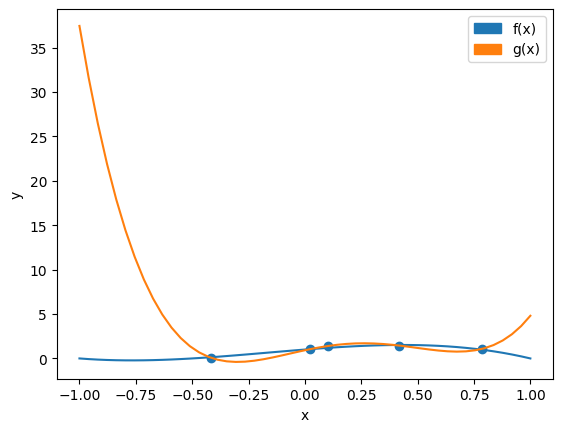

In [52]:
def scatter(X, y, f, w, p=4, start=-1, stop=1, K=50):
    L = np.linspace(start, stop, K)

    plt.xlabel("x")
    plt.ylabel("y")

    plt.legend(handles=[
        mpatches.Patch(color="#1f77b4", label="f(x)"),
        mpatches.Patch(color="#ff7f0e", label="g(x)")
    ])

    plt.scatter(X, y, c="#1f77b4")
    plt.plot(L, f(L), c="#1f77b4")
    plt.plot(L, G(L, w, p), c="#ff7f0e")
    plt.show()

scatter(X_4_1, y_4_1, get_target_function(), w, 4)

(6) Erstellen Sie denselben Plot wie in Schritt (5), nur fügen Sie dieses Mal noch eine weitere finale Hypothese hinzu, nämlich diejenige, die Sie erhalten, wenn Sie $\lambda=0$ setzen. Das Ergebnis für $\lambda=0$ entspricht der unregularisierten Lösung, also der Lösung, die Sie mit klassischer linearer Regression ohne Weight Decay erhalten. Welche der Hypothesen approximiert die Target Function besser?

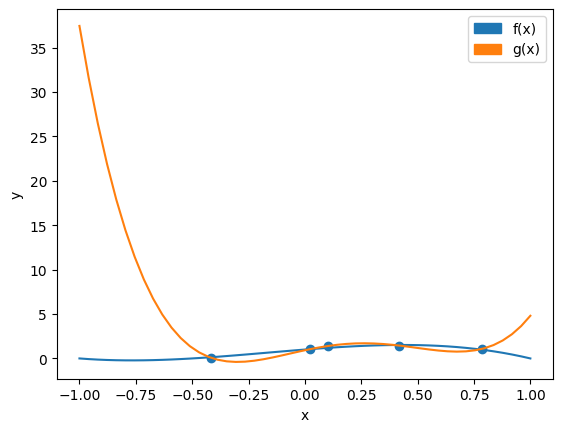

In [53]:
w = lin_reg_regularized(Z_4_1, y_4_1)

scatter(X_4_1, y_4_1, get_target_function(), w)

(7) Erstellen Sie eine **interaktive Visualisierung** mit einem Slider, mit dem Sie den Wert $\lambda$ einstellen können und die automatisch einen Plot mit der entsprechenden regularisierte Lösung zeigt, die dem Wert $\lambda$ entspricht. 
1. Kommentieren Sie dazu den unteren Code ein und vervollständigen Sie die Funktion `showPlot`. Innerhalb der Funktion steht die Variable `lamb` zur Verfügung, die den durch den Slider eingestellten Wert von $\lambda$ enthält. 
2. Führen Sie in der Funktion `showPlot` regularisierte Regression mit $\lambda$ durch. Visualisieren Sie in der Funktion sowohl die Target Function als auch die regularisierte Lösung. [Stellen Sie sicher](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html), dass der gezeigte y-Achsenabschnitt zwischen -1 und 2 liegt.
3. Führen Sie die entsprechende Code-Zelle aus und schieben den Slider hin und her. Beobachten Sie, wie sich die Kurven verändern. Beschreiben Sie qualitativ, wie sich die regularisierte Lösung ändert, wenn der Wert für $\lambda$ erhöht wird.

In [54]:
# Folgender Code ist für Teilaufgabe (7).
# Bitte kommentieren Sie folgenden Code für Teilaufgabe (7) ein und vervollständigen Sie ihn.

from ipywidgets import interact
import ipywidgets as widgets
@interact(lamb=widgets.FloatSlider(min=0,max=1.5,step=0.1,value=0))
def showPlot(lamb):
    # 1. perform regularized linear regression with nonlinear feature transform
    w = lin_reg_regularized(Z_4_1, y_4_1, lamb)
    # 2. Visualize final hypothesis
    scatter(X_4_1, y_4_1, get_target_function(), w)
    # 3. Visualize target function
    # 4. Make sure that y-axis shows region between -1 and 2

interactive(children=(FloatSlider(value=0.0, description='lamb', max=1.5), Output()), _dom_classes=('widget-in…

(8) Schreiben Sie eine Funktion, die den Fehler $E_\text{out}$ im Interval $x\in[-1, 1]$ ermittelt. Sei $y(x)$ der Wert der Target Function an der Stelle $x$ und sei $g_\lambda(x)$ der Wert Ihrer finalen Hypothese an der Stelle $x$ für regularisierte Regression mit dem Regularisierungsparameter $\lambda$. Dann sei der Out-of-Sample Fehler $E_\text{out}(\lambda)$ im Interval $x\in[-1, 1]$ definiert als die mittlere quadratische Abweichung zwischen $g_\lambda$ und $y$ in diesem Interval, 
$E_\text{out}(\lambda) = \frac{1}{K}\sum_k (g_\lambda(x_k) - y(x_k))^2,$ wobei wir hier $K=50$ Stützstellen $x_k$ wählen, die das Interval $[-1, 1]$ gleichmäßig in [äquidistanten Abständen abtasten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html). Hinweis: Sie können sich an Ihrem Code aus Übung 3, Aufgabe 3.2, Schritt 5 bedienen, sollten Sie diese Teilaufgabe bearbeitet haben.

(9) Ermitteln Sie $E_\text{out}(\lambda)$ für $\lambda\in\{0, 0.1, \ldots, 2\}$. Visualisieren Sie $E_\text{out}(\lambda)$ als Funktion von $\lambda$ in einem Plot. Was fällt Ihnen auf?

**Hinweise**
* Für eine bessere Darstellung des Phänomens [wählen Sie bitte eine logarithmische Darstellung des Wertebereichs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html) von $E_\text{out}$.
* Geben Sie sich zusätzlich die Werte von $E_\text{out}$ aus, die für sehr kleine $\lambda$ Werte erreicht werden.

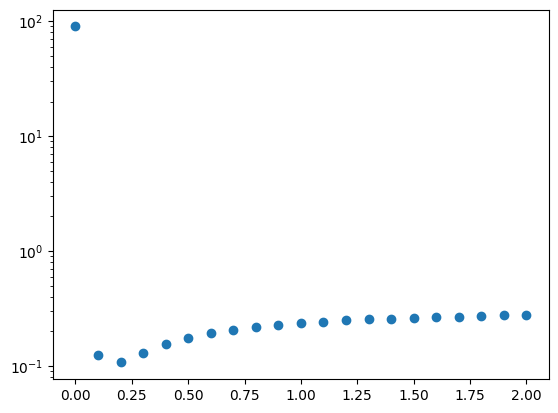

In [60]:
def e_out(f, w, start=-1, stop=1, K=50):
    L = np.linspace(start, stop, K)

    y = f(L)
    g = G(L, w)

    return (g-y)@(g-y) / K

ls = np.linspace(0, 2, 21)
plt.scatter(ls, [e_out(get_target_function(), lin_reg_regularized(Z_4_1, y_4_1, l)) for l in ls])
plt.yscale("log")
plt.show()